# AE4465 (MM&A) - Lecture 1 (Spearman correlation)

Assume you are working for airlineX. They provide you with data about their maintenance events, namely the size of the maintenance team and time to repair of each event. The first task they ask you is to see if repair times are proportional to the number of people working on the repair job.

## Importing libraries and the data
The first thing you need to do is unpack the data from the .csv file to a pandas dataframe structure. You can also open the file in Excel directly to check its contents.

 &nbsp;
<center><img top-margin="10px" alt="Excel data" src="imgs\excel_data2.png" width="700"/></center>


In [6]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
# Import the data in csv file
maintenance_dt = pd.read_csv('data/les01_data2.csv')
# Read the columns
print('The columns of the csv file are: ')
# Iterate over two arrays (column names and index) and print accordingly
for colname, i in zip(maintenance_dt.columns, range(len(maintenance_dt.columns))):
    print(i, '- Column: ', colname)

The columns of the csv file are: 
0 - Column:  Maintenance event
1 - Column:  TimeToRepair(h)
2 - Column:  HumanResources


## Plotting the data with a scatter plot
It is important to see how the data is correlated using a visualization tool. In this case, we will use the scatter plot. We will use the matplotlib package through the alias plt.

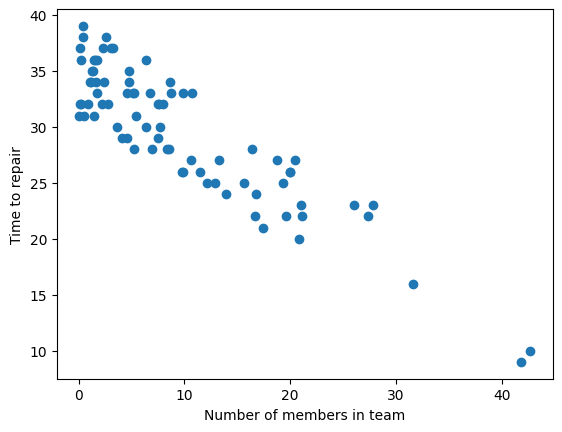

In [5]:
# read the data into two arrays
ttr = maintenance_dt['TimeToRepair(h)']
members_team = maintenance_dt['HumanResources']
# Plot the two indicators against each other
plt.scatter(ttr, members_team)
plt.ylabel('Time to repair')
plt.xlabel('Number of members in team')
plt.show()

## Visual relationship
It seems there is a strong inverse linear relationship between the two data columns as you can see in the chart above. Smaller teams take longer time to finish the maintenance intervention.

## Correlating the two indicators
To correlate the two indicators you need to get the data from the pandas dataframe and use  correlation measures. We use the Pearson correlation and the Spearman correlation in this example.

In statistics, the Pearson correlation coefficient, also known as Pearson's r, is a measure of the linear correlation between two variables (two columns of data). It is the ratio between the covariance of two variables and the product of their standard deviations. The result is always a value between −1 and 1.

$$ \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}} $$

where:
$ \operatorname{cov} $  is the covariance
$ \sigma_{X} $  is the standard deviation of $X$
$ \sigma_{Y} $  is the standard deviation of $Y$

In statistics, Spearman's rank correlation coefficient or Spearman's $\rho$, named after Charles Spearman is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function while Pearson's correlation assesses linear relationships. Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.

$$ \rho _{\operatorname {R} (X),\operatorname {R} (Y)}={\frac {\operatorname {cov} (\operatorname {R} (X),\operatorname {R} (Y))}{\sigma _{\operatorname {R} (X)}\sigma _{\operatorname {R} (Y)}$$

where
$\rho$  denotes the usual Pearson correlation coefficient, but applied to the rank variables,
$\operatorname {cov} (\operatorname {R} (X),\operatorname {R} (Y))$ is the covariance of the rank variables,
$ \sigma _{\operatorname {R} (X)}$ and $\sigma _{\operatorname {R} (Y)}$ are the standard deviations of the rank variables.


## Using the numpy correlation function

Let's use our values and compute the correlation matrix using a numpy function.

In [7]:
my_rho = np.corrcoef(ttr, members_team)
rho, pval = stats.spearmanr(ttr, members_team)

print('Pearson rho', my_rho[0,1])
print('Spearmans rho', rho)

Pearson rho -0.900270493010273
Spearmans rho -0.8155929510453518


## Output of correlations
The Pearson $\rho$ and the Spearman's $\rho$ are both high. This indicates a strong relationship (> 0.8) between the two variables. But since the correlation is negative we see that they are inversely related (one goes up, another goes down). Since the Pearson $\rho$ is higher than the Spearman's $\rho$ we can say the data is more linear than monotonic (see the chart above).

## Conclusion
You learned that correlation coefficients are statistics that measure the association between variables or features of datasets. They’re important in maintenance to analyze the data.

You can use Python to calculate:

- Pearson’s product-moment correlation coefficient
- Spearman’s rank correlation coefficient
- other coefficients such as Kendall's

You can use NumPy, SciPy, and Pandas correlation functions and methods to effectively calculate these (and other) statistics, even when you work with large datasets. You also know how to visualize data.